In [1]:
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import tensorflow as tf
import datetime,os
import array as arr
import numpy as np
import scipy.io as sio
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext tensorboard

In [3]:
# logs_base_dir = "./logs"
# os.makedirs(logs_base_dir, exist_ok=True)

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [6]:
# with tf.device('/CPU:0'):
#   a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#   b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# c = tf.matmul(a, b)
# print(c)

In [7]:
def y_data(list_path):
    mat_file = sio.loadmat(list_path)
    sorted(mat_file.keys())
    array = mat_file['file_list']
    data_array = []
    category_dict = dict()
    with open("/project/dogs/map.txt", 'r') as infile:
        for line in infile:
            line = line.strip().split()
            category_dict[line[0]] = line[1]     
    for image in array:
        splited = np.char.split(image[0],sep = '/')
        name = splited[0][0].split("-",1)[1]
        category_index = category_dict[name]
        array = [int(category_index)]
        data_array.append(array)
    data_array = np.array(data_array)
    return data_array

In [8]:
y_train = y_data('/project/dogs/lists/train_list.mat')

In [9]:
y_test = y_data('/project/dogs/lists/test_list.mat')

In [10]:
print(y_test)

[[66]
 [66]
 [66]
 ...
 [61]
 [61]
 [61]]


In [11]:
x_train = np.load('/project/dogs/data/xtrain.npy',mmap_mode="r")
x_test = np.load('/project/dogs/data/xtest.npy',mmap_mode="r")

In [12]:
x_test.shape

(8580, 90000, 3)

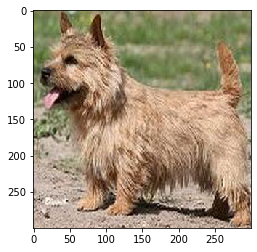

In [13]:
plt.imshow(x_test[2895].reshape(300,300,3))

In [14]:
y_test[2895]

array([91])

In [15]:
x_train = x_train.reshape(12000,300,300,3)

In [16]:
x_test = x_test.reshape(8580,300,300,3)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_cat_train = to_categorical(y_train,120)
y_cat_test = to_categorical(y_test,120)

In [19]:
print(y_train)

[[66]
 [66]
 [66]
 ...
 [61]
 [61]
 [61]]


In [20]:
print(y_cat_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
y_cat_train.shape

(12000, 120)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [23]:
# tf.keras.optimizers.Adam(
#     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
#     name='Adam', **kwargs
# )

In [24]:
# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(300, 300, 3), activation='relu',))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(300, 300, 3), activation='relu',))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(300, 300, 3), activation='relu',))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Flatten())


# model.add(Dense(512, activation='relu'))

# model.add(Dropout(0.5))

# model.add(Dense(120, activation='softmax'))

# opt = Adam(lr=0.000001, decay=1e-10)

# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])

In [25]:
# model.fit(x_train,y_cat_train,epochs=200,validation_data=(x_test,y_cat_test), batch_size=128, shuffle=True)

In [26]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # create and configure augmented image generator
# datagen = ImageDataGenerator(
#     width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
#     height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
#     horizontal_flip=True) # randomly flip images horizontally

# # fit augmented image generator on data
# datagen.fit(x_train)

In [27]:
!rm -rf ./logs/

In [28]:
from datetime import datetime
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(BatchNormalization(input_shape=(300, 300, 3)))
model.add(Conv2D(filters=16, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())


model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(120, activation='softmax'))

opt = Adam(lr=0.0001, decay=1e-8)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [31]:
# model.summary()

In [32]:
#     loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
#     predictions = model(x_train).numpy()
#     print("Initial loss: ", loss_fn(y_train, predictions).numpy())

#     opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
#     model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy'])
#     model.fit(x_train, y_train, batch_size=120, epochs=50, shuffle=True)

In [33]:
# model.fit_generator(datagen.flow(x_train, y_cat_train, batch_size=64),
#                     validation_data=(x_test, y_cat_test), 
#                     steps_per_epoch=len(x_train)/64,
#                     epochs=100)

In [34]:
# model = Sequential()

# model.add(Conv2D(filters = 16, kernel_size = 3, activation ='relu',input_shape=(300,300,3)))
# model.add(BatchNormalization(axis=3))
# model.add(Conv2D(filters = 16, kernel_size = 3, activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters = 32, kernel_size = 3, activation ='relu'))
# model.add(BatchNormalization(axis=3))
# model.add(Conv2D(filters = 64, kernel_size = 3, activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters = 128, kernel_size = 3, activation ='relu'))
# model.add(BatchNormalization(axis=3))
# model.add(Conv2D(filters = 256, kernel_size = 3, activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.25))

# model.add(Flatten())

# # model.add(Dense(512, activation = "relu")) #Fully connected layer
# # model.add(BatchNormalization())
# # model.add(Dropout(0.5))

# model.add(Dense(512, activation = "relu")) #Fully connected layer
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(120, activation = "softmax")) #Classification layer or output layer
# opt = Adam(lr=0.0001, decay=1e-8)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
# logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [35]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test), batch_size=64, shuffle=True, callbacks=[tensorboard_callback])

Train on 12000 samples, validate on 8580 samples
Epoch 1/20
12000/12000 [==============================] - 57s 5ms/sample - loss: 4.5871 - accuracy: 0.0308 - val_loss: 4.6621 - val_accuracy: 0.0235
Epoch 2/20
12000/12000 [==============================] - 52s 4ms/sample - loss: 4.2806 - accuracy: 0.0585 - val_loss: 4.2169 - val_accuracy: 0.0679
Epoch 3/20
12000/12000 [==============================] - 53s 4ms/sample - loss: 4.1126 - accuracy: 0.0763 - val_loss: 4.0398 - val_accuracy: 0.0908
Epoch 4/20
12000/12000 [==============================] - 53s 4ms/sample - loss: 3.9708 - accuracy: 0.0902 - val_loss: 3.9230 - val_accuracy: 0.1021
Epoch 5/20
12000/12000 [==============================] - 54s 4ms/sample - loss: 3.8618 - accuracy: 0.1080 - val_loss: 3.8398 - val_accuracy: 0.1128
Epoch 6/20
12000/12000 [==============================] - 53s 4ms/sample - loss: 3.7745 - accuracy: 0.1210 - val_loss: 3.7792 - val_accuracy: 0.1220
Epoch 7/20
12000/12000 [==============================] -

In [90]:
# %tensorboard --logdir logs 

In [36]:
%tensorboard --logdir logs --host 0.0.0.0 --port 8800

In [133]:
# %tensorboard --logdir logs --host 0.0.0.0 --port 8880

In [39]:
!kill 105

/bin/sh: 1: kill: No such process



In [62]:
model.metrics_names

['loss', 'accuracy']

In [1]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

NameError: name 'model' is not defined

In [64]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
losses.head()

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
print(classification_report(y_test,predictions))